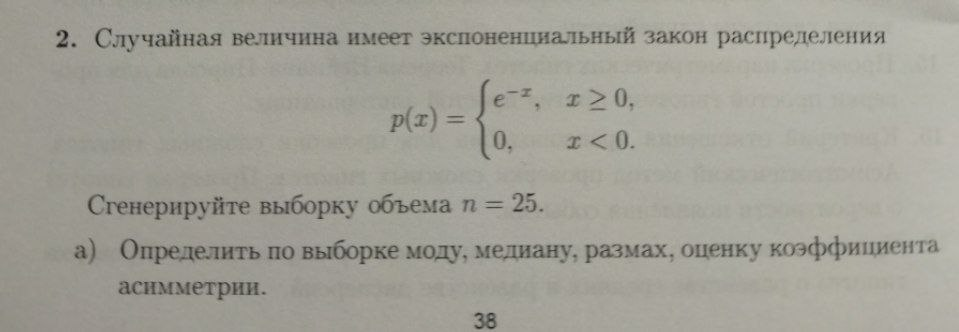

In [367]:
from IPython.display import Image
Image("images/photo_5350278556795665960_y.jpg")

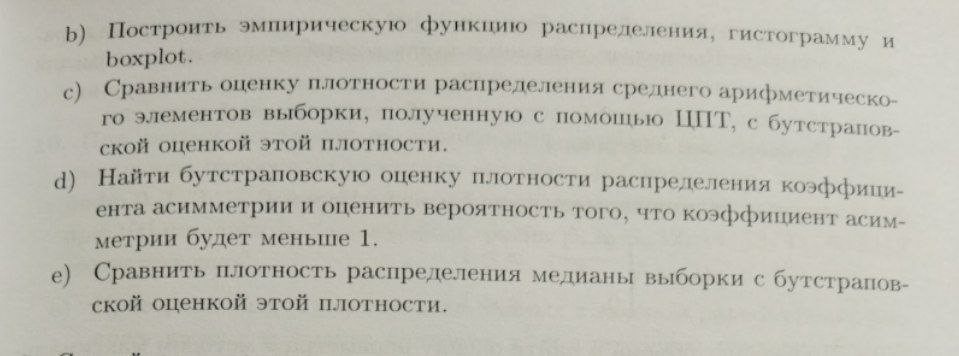

In [368]:
Image("images/photo_5350494331657645186_y.jpg")

In [ ]:
import numpy as np
import random

def p(x):
    if x < 0:
        return 0
    else:
        return float(np.exp(-x))
    
def F(x):
    if x < 0:
        return 0
    else:
        return float(1 - np.exp(-x))
    
def F_reversed(y):
    if y < 0:
        return 0
    else:
        return float(np.log(1 - y) * (-1))

# здесь можно поменять размер генерируемой выборки
n = 25
sample = [0.] * n
for i in range(n):
    sample[i] = F_reversed(random.random())


In [370]:
# a)
var_series = sorted(sample)
l = var_series[-1] - var_series[0]
mediana = var_series[n//2+1] if n % 2 == 1 else (var_series[k] + var_series[k-1])/2
counter = [var_series.count(var_series[i]) for i in range(n)]
moda = []
for i in range(n):
    if counter[i] == max(counter):
        moda.append(var_series[i])

def M_k(var_series, k):
    arr = np.array(var_series)
    return np.sum((arr - arr.mean())**k)/arr.size

assym = M_k(var_series, 3) / (M_k(var_series, 2) ** (1.5))
print("Мода: ", moda, "\nМедиана: ", mediana, "\nРазмах: ", l, "\nОценка коэффициента ассиметрии: ", assym)
print(M_k(var_series, 1))
print(M_k(var_series, 2))


Мода:  [0.0030475761581705003, 0.004339247657828402, 0.0072183270472492385, 0.009553092336368212, 0.021396075436841987, 0.022503230979574042, 0.024204868195380064, 0.026146781803383787, 0.027292841467270464, 0.031367329038249736, 0.03202899285459104, 0.04999942077837287, 0.05655923077779401, 0.05785873772065207, 0.06030188447979391, 0.0625018435729197, 0.06281493334899613, 0.06999072141292789, 0.08368957081576342, 0.09299583436127568, 0.09479714461405976, 0.0974448856713529, 0.10106062110461687, 0.10120439670028587, 0.1039038851311936, 0.10718735594925227, 0.11795208403315624, 0.13112648330738394, 0.13408609970853405, 0.1348084188215301, 0.13998845997066414, 0.14631298347930594, 0.15854361897581246, 0.16758996455323752, 0.178037145326467, 0.1845801119024902, 0.19850848581238292, 0.19960629385318088, 0.2110155922003754, 0.2154092054458568, 0.2222783639026962, 0.22362044836508693, 0.2243798140575878, 0.2245331617351855, 0.24379907513811586, 0.2509486182069149, 0.2515815924863139, 0.25204

Text(0.5, 1.0, 'Histogram')

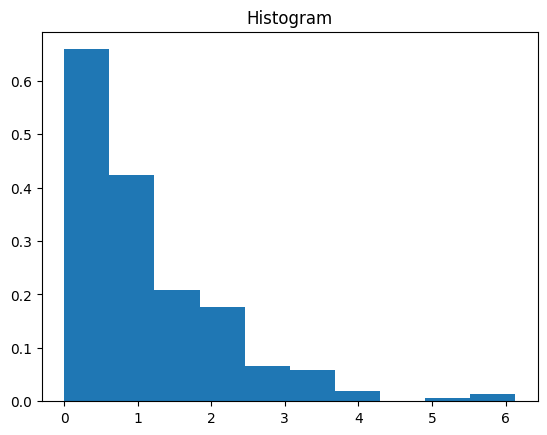

In [371]:
# b)
import matplotlib.pyplot as plt
plt.hist(var_series, 10, density=True)
plt.title("Histogram")

Text(0.5, 1.0, 'Distribution function')

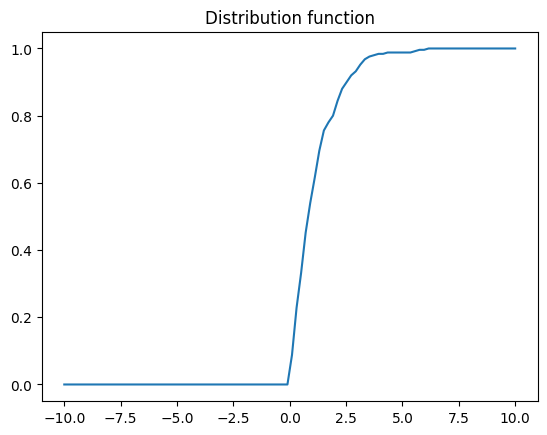

In [372]:
np_var_series = np.array(var_series)
distribution_right_bins = np.linspace(-10, 10, 100)
distribution = ( np_var_series.reshape(-1, 1) < distribution_right_bins.reshape(1, -1) ).mean(0)
plt.plot(distribution_right_bins, distribution)
plt.title("Distribution function")

Text(0.5, 1.0, 'Distribution function 2.0 beautified')

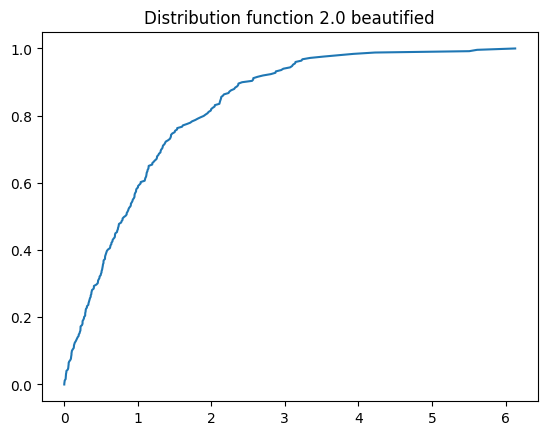

In [373]:
plt.plot(var_series, np.linspace(0, 1, len(var_series)))
plt.title("Distribution function 2.0 beautified")

Text(0.5, 1.0, 'Boxplot')

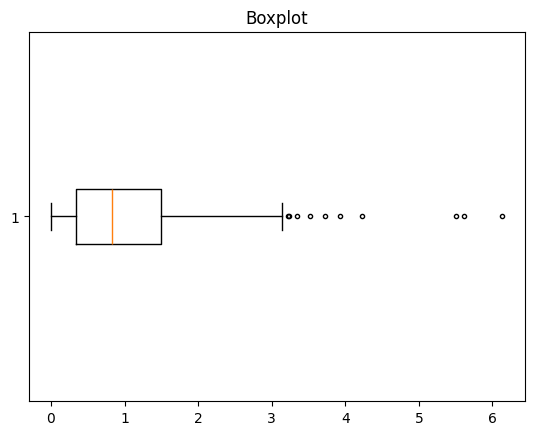

In [374]:
plt.boxplot(np_var_series, vert=False, sym='.')
plt.title("Boxplot")

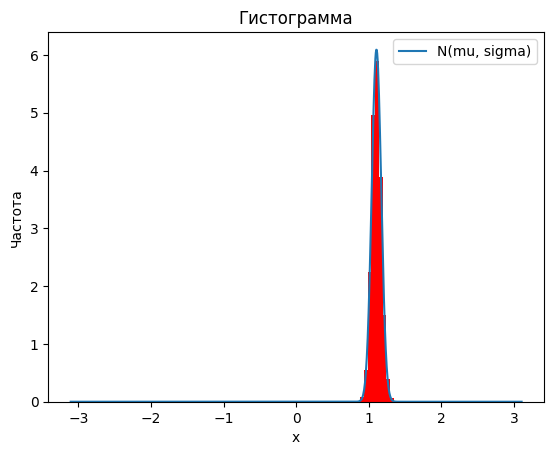

In [375]:
# c)
from scipy.stats import norm

size = 10000
bootstrap = []
for _ in range(size):
    bootstrap.append(np.mean(np.random.choice(var_series, size=len(var_series), replace=True)))

mu = M_k(var_series, 1)
sigma = M_k(var_series, 2) ** 0.5
x = np.linspace(mu - sigma*3, mu + sigma*3, 1000)
y = norm.pdf(x, np.mean(var_series), sigma/(n**0.5))

plt.hist(bootstrap, 10, color='r', density=True)
plt.plot(x, y, label='N(mu, sigma)')
plt.xlabel('x')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.legend()